# SVR using linear kernal

In [1]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline
import pickle

In [2]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
df = pd.DataFrame(json.loads(res.content)['Data'])

In [3]:
df = df.drop(['conversionType', 'conversionSymbol'], axis = 1)

In [4]:
df.head()

,time,high,low,open,volumefrom,volumeto,close
0,1465344000,582.44,567.78,575.58,49604.16,2.870622e+07,580.51
1,1465430400,580.71,569.26,580.51,48613.35,2.801058e+07,574.69
2,1465516800,579.26,571.14,574.69,45501.86,2.629087e+07,577.89
3,1465603200,592.61,576.29,577.89,42217.02,2.479044e+07,591.60
4,1465689600,683.85,592.79,591.60,217379.53,1.396846e+08,666.55


In [5]:
df.tail()

,time,high,low,open,volumefrom,volumeto,close
1996,1637798400,59437.04,57056.64,57175.09,24221.47,1.412787e+09,58966.99
1997,1637884800,59201.95,53575.54,58966.99,60064.72,3.312563e+09,53788.22
1998,1637971200,55316.65,53668.95,53788.22,18504.73,1.010586e+09,54805.03
1999,1638057600,57475.26,53436.05,54805.03,21562.34,1.186995e+09,57331.41
2000,1638144000,58898.57,56752.37,57331.41,24515.91,1.412482e+09,58296.28


In [6]:
df = df.drop('time', axis = 1)

In [7]:
list(df.columns)

['high', 'low', 'open', 'volumefrom', 'volumeto', 'close']

In [8]:
test_df = df[-30:]

In [9]:
X_test = test_df.iloc[:, [0, 1, 2, 3, 4]].values
y_test = test_df.iloc[:, [5]].values

In [10]:
from sklearn.preprocessing import StandardScaler

sc_X_test = StandardScaler()
X_test = sc_X_test.fit_transform(X_test)

sc_y_test = StandardScaler()
y_test = sc_y_test.fit_transform(y_test)

In [11]:
train_df = df[:len(df)-30]

In [12]:
X = train_df.iloc[:, [0, 1, 2, 3, 4]].values
y = train_df.iloc[:, [5]].values

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [14]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.svm import SVR
# Create and train the Support Vector Machine 
svr_lin = SVR(kernel='linear', C=1000)#Create the model
svr_lin.fit(X_train, y_train) #Train the model

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=1000, kernel='linear')

In [17]:
# save the model to disk
filename = 'finalized_SVR_with_linear_model.sav'
pickle.dump(svr_lin, open(filename, 'wb'))

In [19]:
svr_lin_confidence = svr_lin.score(X_val, y_val)
print("svr_rbf accuracy: ", svr_lin_confidence)

svr_rbf accuracy:  0.9990133668550908


In [20]:
# Print the predicted value
y_val_prediction = svr_lin.predict(X_val)
y_val_prediction = sc_y_test.inverse_transform(y_val_prediction)

print()

#Print the actual values
y_val_test = sc_y_test.inverse_transform(y_val)

In [21]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [CAD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)

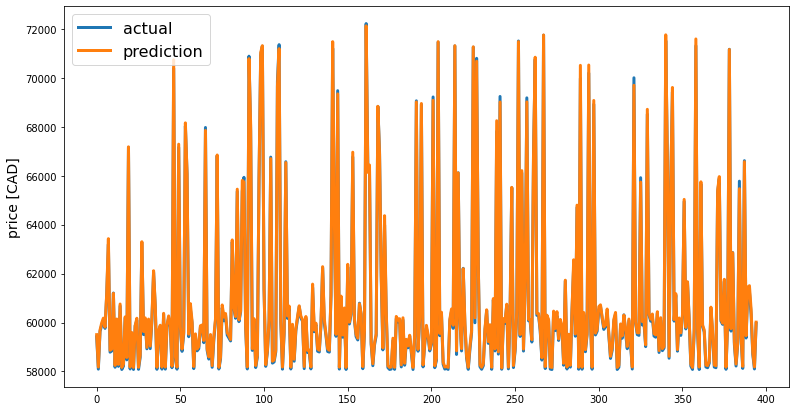

In [22]:
line_plot(y_val_test, y_val_prediction, 'actual', 'prediction', lw=3)

# test data

In [23]:
# Print the predicted value
y_prediction = svr_lin.predict(X_test)
y_prediction = sc_y_test.inverse_transform(y_prediction)

print()

#get the actual values
y_test = sc_y_test.inverse_transform(y_test)

In [24]:
print(np.concatenate((y_prediction.reshape(len(y_prediction),1), y_test.reshape(len(y_test),1)),1))

[[61165.87360248 61349.75      ]
 [61108.35411941 60960.98      ]
 [63325.72200607 63260.05      ]
 [62161.11725255 62929.93      ]
 [61740.54706193 61448.47      ]
 [62161.74078813 61019.66      ]
 [61162.95720831 61529.76      ]
 [63028.39753216 63302.78      ]
 [66579.68858332 67549.14      ]
 [67686.17435307 66939.24      ]
 [65603.54571501 64926.06      ]
 [65216.54787521 64820.8       ]
 [63668.82398995 64156.3       ]
 [64525.86005851 64409.56      ]
 [64915.84516717 65509.06      ]
 [64799.97405236 63614.06      ]
 [60180.81141884 60108.9       ]
 [59922.0543282  60365.6       ]
 [58201.66411252 56930.68      ]
 [57379.94834569 58136.22      ]
 [59160.40052208 59769.66      ]
 [59485.53736253 58700.83      ]
 [57180.552715   56303.06      ]
 [57217.62714211 57566.6       ]
 [56883.45332847 57175.09      ]
 [59024.64379945 58966.99      ]
 [55197.40855515 53788.22      ]
 [55202.7558125  54805.03      ]
 [55786.15159601 57331.41      ]
 [58379.31228562 58296.28      ]]


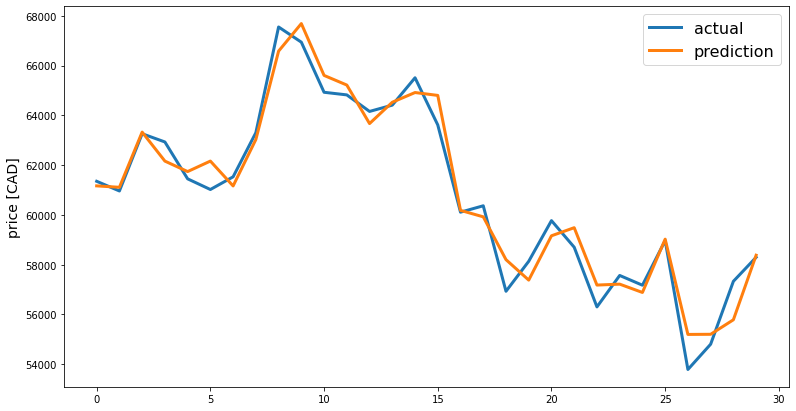

In [25]:
line_plot(y_test, y_prediction, 'actual', 'prediction', lw=3)

In [26]:
from sklearn.metrics import max_error

mre = max_error(y_test, y_prediction)
print("Maximum Residual Error :", mre)

Maximum Residual Error : 1545.2584039895592


In [27]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_prediction)
print("Mean absolute Error :", mae)

Mean absolute Error : 578.7081164277365


In [28]:
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_prediction)
rmse = math.sqrt(mse)
print("Mean Squered Error :", mse)
print("Root Mean Squered Error :",rmse)

Mean Squered Error : 508942.9867270792
Root Mean Squered Error : 713.4024016830047


In [29]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_prediction)
print("Mean absolute percentage error : ", mape)

Mean absolute percentage error :  0.009619515501508009


In [30]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_prediction)
print("R2 error", r2)

R2 error 0.9584712774721296


In [32]:
adjecent_r2 = 1 - (1-svr_lin.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("adjecent R2 error", adjecent_r2)

adjecent R2 error -365.4749374785002
